# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of claim that have been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard Tableau would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answer AND the Tableau Dashboard Link to regitaz@gmail.com. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tsaData = pd.read_csv('tsa_claims.csv')

C:\Users\Hafid\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
tsaData.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [4]:
tsaData.loc[51061:51065]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2004122971527,2-Dec-04,10/29/2004 0:00,TRI,Tri-Cities Regional,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$68.25,Approved,$68.25,Approve in Full
51062,2004122971530,2-Dec-04,10/30/2004 0:00,MIA,Miami International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$80.00,Approved,$80.00,Approve in Full
51063,2004122971533,2-Dec-04,10/31/2004 0:00,CLL,Easterwood/College Station; TX,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$325.67,Approved,$325.67,Approve in Full
51064,2004122971554,2-Dec-04,11/8/2004 0:00,ABQ,Albuquerque International Sunport Airport,UAL,Passenger Property Loss,Checked Baggage,Locks,$14.36,Approved,$14.36,Approve in Full
51065,2004122971557,2-Dec-04,8/7/2004 0:00,IAH,Houston - George Bush Intercontinental Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,$19.17,Approved,$19.17,Approve in Full


In [5]:
tsaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 10.1+ MB


In [6]:
tsaData.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013081205863,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [7]:
tsaData.isnull().sum()

Claim Number         0
Date Received      263
Incident Date     2183
Airport Code      8524
Airport Name      8524
Airline Name     34374
Claim Type        7913
Claim Site         740
Item              3966
Claim Amount      4043
Status               5
Close Amount     68952
Disposition      72908
dtype: int64

If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [8]:
tsaData.replace('-',np.NaN)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [9]:
tsaData['Date Received'] = pd.to_datetime(tsaData['Date Received'])

In [10]:
tsaData['Incident Date'] = pd.to_datetime(tsaData['Incident Date'], errors = 'coerce')
tsaData['Incident Date']

0        2002-12-12
1        2004-01-16
2        2003-11-26
3        2003-01-06
4        2005-02-05
            ...    
204262   2015-10-16
204263   2015-12-02
204264   2015-12-20
204265   2015-12-28
204266   2015-11-23
Name: Incident Date, Length: 204267, dtype: datetime64[ns]

In [11]:
tsaData

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [12]:
tsaData['Date Received'] = pd.to_datetime(tsaData['Date Received'])

In [13]:
tsaData['Incident Date'] = pd.to_datetime(tsaData['Incident Date'], errors = 'coerce')

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [14]:
tsaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204267 non-null  object        
 1   Date Received  204004 non-null  datetime64[ns]
 2   Incident Date  201920 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   169893 non-null  object        
 6   Claim Type     196354 non-null  object        
 7   Claim Site     203527 non-null  object        
 8   Item           200301 non-null  object        
 9   Claim Amount   200224 non-null  object        
 10  Status         204262 non-null  object        
 11  Close Amount   135315 non-null  object        
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 11.7+ MB


In [15]:
tsaData.sample(20)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
148546,2010051771832,2010-05-10,2010-03-29 12:26:00,TPA,Tampa International,Continental Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,$22.60,Approve in Full,NaN,NaN
200250,2015101926065,2015-09-25,2015-08-20 00:00:00,LAX,Los Angeles International Airport,American Airlines,Property Damage,Checkpoint,Jewelry & Watches,-,-,NaN,NaN
125063,2008071146833,2008-07-03,2008-05-31 00:00:00,JFK,John F. Kennedy International,UAL,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Lu...,$6;000.00,Denied,$0.00,Deny
79911,2006020801117,2006-01-31,2005-11-26 00:00:00,DFW,Dallas-Fort Worth International Airport,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Denied,$0.00,Deny
55512,2005021876486,2005-01-26,2004-10-22 00:00:00,MIA,Miami International Airport,NaN,Property Damage,Checked Baggage,Other,$59.95,Approved,$59.95,Approve in Full
128970,2008100350754,2008-10-01,2008-09-24 00:00:00,MIA,Miami International Airport,Alaska Airlines,Passenger Property Loss,Checked Baggage,Watches - Expensive more than $100,$1;440.00,Denied,$0.00,Deny
131526,2008121753460,2008-12-09,2008-11-19 00:00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$165.00,Canceled,$0.00,NaN
191370,2014071615181,2014-06-27,2014-06-05 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing,$150.00,Approve in Full,NaN,NaN
96445,2006122217762,2006-12-19,2006-12-05 00:00:00,OAK,Metropolitan Oakland International,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$125.00,Denied,$0.00,Deny
122194,2008050543792,2008-05-01,2008-04-29 00:00:00,LAX,Los Angeles International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$135.90,Denied,$0.00,Deny


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [16]:
tsaData['Day Differences'] = tsaData['Date Received']-tsaData['Incident Date']
tsaData

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full,-342 days
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle,-713 days
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle,-660 days
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333 days
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full,-1083 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN,35 days
204263,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN,15 days
204264,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN,2 days
204265,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN,2 days


Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

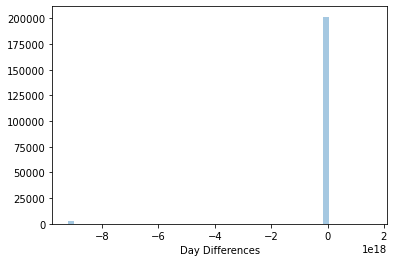

In [17]:
tsaData.dropna()
sns.distplot((tsaData['Day Differences']),kde=False)

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

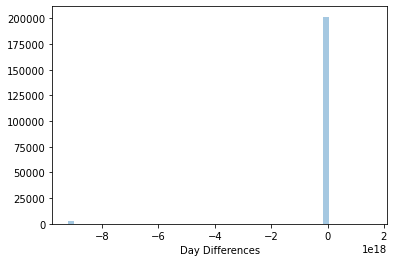

In [18]:
sns.distplot((tsaData['Day Differences']),kde=False)

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

mungkin karena adanya celah dalam pelaksanaan klaim sehingga orang dapat mencari untung dari sistem tersebut dengan melakukan klaim yang di sengaja

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [20]:
tsaData['Claim Amount'] = tsaData['Claim Amount'].str.replace('[\$,\;,\-,\,]','',regex=True)
tsaData['Close Amount'] = tsaData['Close Amount'].str.replace('[\$,\;,\-,\,]','',regex=True)
tsaData['Claim Amount'] = tsaData['Claim Amount'].replace('',np.NaN)
tsaData

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full,-342 days
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle,-713 days
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,-660 days
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333 days
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full,-1083 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,-,NaN,NaN,35 days
204263,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,-,NaN,NaN,15 days
204264,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,NaN,-,NaN,NaN,2 days
204265,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,-,NaN,NaN,2 days


In [24]:
tsaData['Close Amount'] = tsaData['Close Amount'].astype(float)
tsaData['Claim Amount'] = tsaData['Claim Amount'].astype(float)
tsaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   Claim Number     204267 non-null  object         
 1   Date Received    204004 non-null  datetime64[ns] 
 2   Incident Date    201920 non-null  datetime64[ns] 
 3   Airport Code     195743 non-null  object         
 4   Airport Name     195743 non-null  object         
 5   Airline Name     169893 non-null  object         
 6   Claim Type       196354 non-null  object         
 7   Claim Site       203527 non-null  object         
 8   Item             200301 non-null  object         
 9   Claim Amount     187472 non-null  float64        
 10  Status           204262 non-null  object         
 11  Close Amount     135315 non-null  float64        
 12  Disposition      131359 non-null  object         
 13  Day Differences  201781 non-null  timedelta64[ns]
dtypes: d

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [25]:
tsaData['Amount Differences'] = tsaData['Claim Amount'] - tsaData['Close Amount']
tsaData

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full,-342 days,0.00
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle,-713 days,50.00
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,-660 days,50.96
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333 days,0.00
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full,-1083 days,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,-,NaN,NaN,35 days,NaN
204263,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,-,NaN,NaN,15 days,NaN
204264,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,NaN,-,NaN,NaN,2 days,NaN
204265,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,-,NaN,NaN,2 days,NaN


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

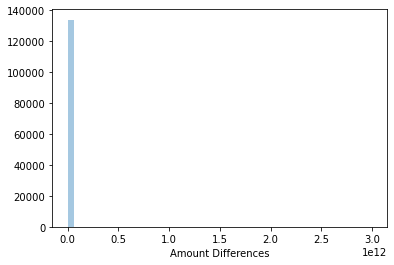

In [27]:
sns.distplot((tsaData['Amount Differences']),kde=False)

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data